In [33]:
import datetime
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from scipy.stats import ttest_ind

In [34]:
df = pd.read_csv('contributions-github-20220202-124509_full.csv', parse_dates=['date'], low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94170 entries, 0 to 94169
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   username  94170 non-null  object        
 1   count     94170 non-null  int64         
 2   date      94170 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.2+ MB


In [36]:
df.shape

(94170, 3)

In [37]:
df.dtypes

username            object
count                int64
date        datetime64[ns]
dtype: object

In [38]:
df.head(20)

,username,count,date
0,aashah,0,2021-01-01
1,aashah,0,2021-01-02
2,aashah,0,2021-01-03
3,aashah,0,2021-01-04
4,aashah,7,2021-01-05
5,aashah,11,2021-01-06
6,aashah,5,2021-01-07
7,aashah,8,2021-01-08
8,aashah,0,2021-01-09
9,aashah,0,2021-01-10


In [39]:
df_user1 = df.loc[df['username'] == 'domofactor']

In [41]:
# resampled weekly and monthly
df_user1_weekly = df_user1.resample('W-MON', on='date').sum()
df_user1_monthly = df_user1.resample('M', on='date').sum()

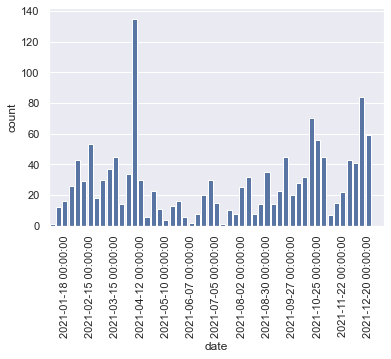

In [43]:
# Single User contributions
user1_barplot_weekly = sns.barplot(x =df_user1_weekly.index, y = "count", data = df_user1_weekly, color='b')
plt.xticks(rotation=90)

user1_barplot_weekly.xaxis.set_major_locator(mdates.DayLocator(interval=4))
# user1_barplot_weekly.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 

plt.show()

In [44]:
df_user1_weekly.head(20)

,count
date,
2021-01-04,1
2021-01-11,12
2021-01-18,16
2021-01-25,26
2021-02-01,43
2021-02-08,29
2021-02-15,53
2021-02-22,18
2021-03-01,30


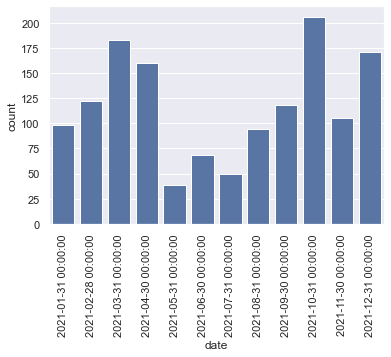

In [45]:
user1_barplot_monthly = sns.barplot(x =df_user1_monthly.index, y = "count", data = df_user1_monthly, color='b')
plt.xticks(rotation=90)

plt.show()

In [46]:
df_user1_weekly

,count
date,
2021-01-04,1
2021-01-11,12
2021-01-18,16
2021-01-25,26
2021-02-01,43
2021-02-08,29
2021-02-15,53
2021-02-22,18
2021-03-01,30


In [47]:
# rslt_df = dataframe[dataframe['Percentage'] > 70] # example

df_user1_weekly_over2 = df_user1_weekly[df_user1_weekly['count'] > 2]

In [48]:
df_user1_weekly.shape

(53, 1)

In [49]:
df_user1_weekly_over2.shape # so removed 5 rows

(48, 1)

In [50]:
df_user1_weekly.head(1)

,count
date,
2021-01-04,1


In [51]:
# 2021-02-01

df_user1_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2021-01-04 to 2022-01-03
Freq: W-MON
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   53 non-null     int64
dtypes: int64(1)
memory usage: 2.9 KB


In [52]:
dt_feb1 = datetime.datetime(2021, 2, 1)

In [53]:
dt_feb1

datetime.datetime(2021, 2, 1, 0, 0)

In [54]:
df_user1_weekly_jan = df_user1_weekly.loc['2020-12-31':'2021-01-31']
# df.loc['2014-01-01':'2014-02-01']

In [55]:
df_user1_weekly_jan

,count
date,
2021-01-04,1
2021-01-11,12
2021-01-18,16
2021-01-25,26


In [20]:
df_user1_weekly_train_feb_jun = df_user1_weekly.loc['2021-02-01':'2021-06-30']

In [21]:
df_user1_weekly_train_feb_jun

,count
date,
2021-02-01,43
2021-02-08,29
2021-02-15,53
2021-02-22,18
2021-03-01,30
2021-03-08,37
2021-03-15,45
2021-03-22,14
2021-03-29,34


In [56]:
df_user1_weekly_test_jul_aug = df_user1_weekly.loc['2021-07-18':'2021-08-29']

In [57]:
df_user1_weekly_test_jul_aug

,count
date,
2021-07-19,10
2021-07-26,8
2021-08-02,25
2021-08-09,32
2021-08-16,8
2021-08-23,14


In [ ]:
# EXAMPLE from
# https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
# DO NOT Execute

from scipy.stats import ttest_ind
import numpy as np
week1 = np.genfromtxt("week1.csv",  delimiter=",")
week2 = np.genfromtxt("week2.csv",  delimiter=",")
print(week1)
print("week2 data :-\n")
print(week2)
week1_mean = np.mean(week1)
week2_mean = np.mean(week2)
print("week1 mean value:",week1_mean)
print("week2 mean value:",week2_mean)
week1_std = np.std(week1)
week2_std = np.std(week2)
print("week1 std value:",week1_std)
print("week2 std value:",week2_std)
ttest,pval = ttest_ind(week1,week2)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

In [58]:
test_data_user1 = df_user1_weekly_test_jul_aug["count"].to_numpy()

In [59]:
test_data_user1

array([10,  8, 25, 32,  8, 14])

In [60]:
train_data_user1 = df_user1_weekly_train_feb_jun["count"].to_numpy()

In [61]:
train_mean = np.mean(train_data_user1)
test_mean = np.mean(test_data_user1)
print("week1 mean value:",train_mean)
print("week2 mean value:",test_mean)
train_std = np.std(train_data_user1)
test_std = np.std(test_data_user1)
print("week1 std value:",train_std)
print("week2 std value:",test_std)
ttest,pval = ttest_ind(train_data_user1,test_data_user1)
print("p-value",pval)
# if pval <0.05:

week1 mean value: 27.59090909090909
week2 mean value: 16.166666666666668
week1 std value: 27.284126405641217
week2 std value: 9.172725270544674
p-value 0.3393059429836499


In [ ]:
# reference one tailed p value:
#https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy

In [ ]:
p_values = []

In [ ]:
# the entire company

In [62]:
df_grouped_date = df.groupby('date', as_index=False).sum()

In [63]:
df_grouped_date_weekly = df_grouped_date.resample('W-MON', on='date').sum()

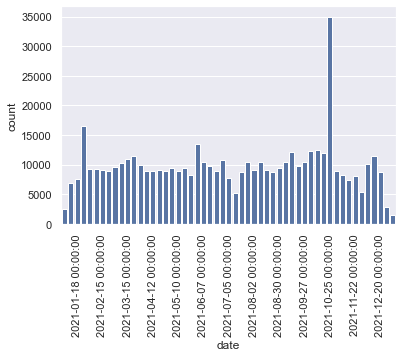

In [64]:
all_barplot_weekly = sns.barplot(x =df_grouped_date_weekly.index, y = "count", data = df_grouped_date_weekly, color='b')
plt.xticks(rotation=90)

all_barplot_weekly.xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.show()

In [65]:
df_grouped_date_monthly = df_grouped_date.resample('M', on='date').sum()

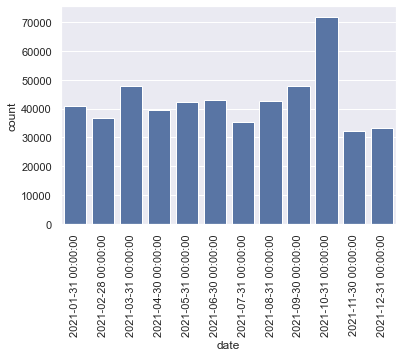

In [66]:
all_barplot_monthly = sns.barplot(x =df_grouped_date_monthly.index, y = "count", data = df_grouped_date_monthly, color='b')
plt.xticks(rotation=90)

plt.show()

In [67]:
df_all_users_weekly_train_feb_jun = df_grouped_date_weekly.loc['2021-02-01':'2021-06-30']

In [68]:
df_all_users_weekly_test_jul_aug = df_grouped_date_weekly.loc['2021-07-18':'2021-08-29']

In [69]:
test_data_all_users = df_all_users_weekly_test_jul_aug["count"].to_numpy()

In [70]:
test_data_all_users

array([ 8708, 10393,  9091, 10495,  9159,  8787])

In [71]:
train_data_all_users = df_all_users_weekly_train_feb_jun["count"].to_numpy()

In [73]:
train_mean_all_users = np.mean(train_data_all_users)
test_mean_all_users = np.mean(test_data_all_users)
print("train mean value:",train_mean_all_users)
print("test mean value:",test_mean_all_users)
train_std_all_users = np.std(train_data_all_users)
test_std_all_users = np.std(test_data_all_users)
print("train std value:",train_std_all_users)
print("test std value:",test_std_all_users)
ttest,pval = ttest_ind(train_data_all_users,test_data_all_users)
print("p-value",pval)
# if pval <0.05:

train mean value: 9723.59090909091
test mean value: 9438.833333333334
train std value: 1120.6577070100361
test std value: 728.4939754193045
p-value 0.5749503919149499


In [74]:
if pval<0.10:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

accept null hypothesis


In [71]:
ttest

0.5679365291383107

In [80]:
# There are total of how many users:
usernames = df['username'].unique()
print(len(user_names))

258


The p-value is not under 10%. Therefore we have to accept the null hypothesis, the two populations are not different. Thus, for the entire population of 258 users, overall were just as productive during the 4 day week, as they were during a 5 day week.

Now let's do the p-test for each user individually. 

In [84]:
p_values = []
for username in usernames:
    df_user = df.loc[df['username'] == username]
    df_user_weekly = df_user.resample('W-MON', on='date').sum()
    # for individual users drop weeks that had less than 3 contributions. Person most likely on vacation
    df_user_weekly_over2 = df_user_weekly[df_user1_weekly['count'] > 2]
    df_user_weekly_train_jan_jun = df_user_weekly_over2.loc['2021-01-10':'2021-06-30']
    df_user_weekly_test_jul_aug = df_user_weekly_over2.loc['2021-07-18':'2021-08-29']
    
    train_data_user = df_user_weekly_train_jan_jun["count"].to_numpy()
    test_data_user = df_user_weekly_test_jul_aug["count"].to_numpy()
    
    # P Test and other statistics
    ttest_user,pval_user = ttest_ind(train_data_user,test_data_user)
    print("p-value",pval_user)
    p_values.append(pval_user)

p-value 0.06793609841192479
p-value 0.18895341652714795
p-value 0.00656138223024151
p-value 0.5811229462781269
p-value 0.31610665435736945
p-value 0.0045719532337108295
p-value nan
p-value 0.3393188233197587
p-value 0.20731247521607268
p-value 0.08777184834935091
p-value 0.018512089674248448
p-value 0.021199178047173778
p-value 0.0036402271828400693
p-value 0.2189940948347038
p-value 0.8180654432793493
p-value 0.3230912454945669
p-value 0.2799492572590741
p-value 0.16562412084860056
p-value nan
p-value 0.47217652347229044
p-value 0.11397316167414369
p-value 0.42317661506327064
p-value 0.5395842118011456
p-value 0.29416758911044727
p-value 0.37595330405041516
p-value 0.6147227184244493
p-value 0.5221655175057582
p-value 0.2043527480436863
p-value 0.008050359609932497
p-value 0.018304599349191902
p-value 0.6642010241079394
p-value 0.2324671239693723
p-value 0.14752705064185528
p-value 0.6099766846530851
p-value 0.244723938505094
p-value 0.4814379652288645
p-value 0.5147063726477477
p-val

In [87]:
users_no_impact_on_productivity = 0
users_with_impact_on_productivity = 0
for p in p_values:
    if p<0.10:
        users_with_impact_on_productivity +=1
    else:
        users_no_impact_on_productivity +=1

In [88]:
# So number of users whose productivity was or was not impacted is as following:
print(f'No impact to productivity: {users_no_impact_on_productivity}')
print(f'Had impact on productivity: {users_with_impact_on_productivity}')

No impact to productivity: 173
Had impact on productivity: 85


In [ ]:
# EXAMPLE of pichart - do not execute
# from: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


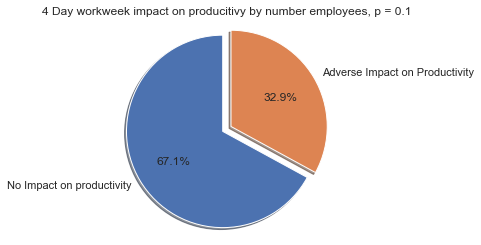

In [90]:
# Threshold for p to 0.1, checking impact on productivity.

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'No Impact on productivity', 'Adverse Impact on Productivity'
sizes = [users_no_impact_on_productivity, users_with_impact_on_productivity]
explode = (0.1, 0)  # only "explode" the no impact on productivity

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('4 Day workweek impact on producitivy by number employees, p = 0.1')

plt.show()

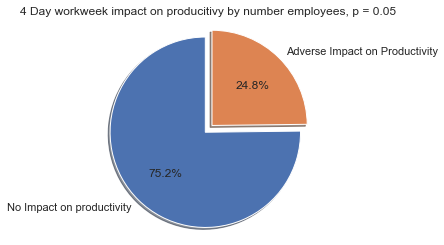

In [93]:
# If we set threshold for p to 0.05

users_no_impact_on_productivity_05 = 0
users_with_impact_on_productivity_05 = 0
for p in p_values:
    if p<0.05:
        users_with_impact_on_productivity_05 +=1
    else:
        users_no_impact_on_productivity_05 +=1
        
# Pie chart
labels = 'No Impact on productivity', 'Adverse Impact on Productivity'
sizes = [users_no_impact_on_productivity_05, users_with_impact_on_productivity_05]
explode = (0.1, 0)  # only "explode" the no impact on productivity

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('4 Day workweek impact on producitivy by number employees, p = 0.05')

plt.show()

### AREMA Time Series ML